Task:

Load the „pattern_X.tif” 8×8 image. 
Convert to grayscale only if it is needed. 
Compute the result when the pattern is convolved with each of the masks (a) to (d) shown. Pad the image with zeroes.

In [15]:
from  PIL import Image
import matplotlib.pyplot as plt
import numpy as np

pattern = Image.open('./pattern_h.tif').convert("L")

mask_a = np.array([
    [-1, -1, 0], 
    [-1, 0, 1], 
    [0, 1, 1]
    ])

mask_b = np.array([
    [0, -1, -1], 
    [1, 0, -1], 
    [1, 1, 1]
    ])

mask_d = np.array([
    [-1, -1, -1], 
    [-1, 8, -1], 
    [-1, -1, -1]
    ])

mask_c = mask_d * -1

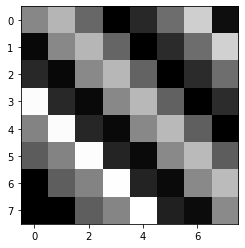

In [16]:
plt.figure()
plt.imshow(pattern, 'gray')

In [115]:
pattern_array = np.uint8(np.array(pattern))
pattern_array

array([[129, 173,  99,   0,  39, 104, 198,  14],
       [  8, 130, 174,  97,   0,  41, 104, 200],
       [ 40,   8, 131, 175,  95,   0,  41, 105],
       [241,  39,   9, 130, 176,  93,   0,  42],
       [125, 241,  37,   9, 130, 177,  91,   0],
       [ 88, 126, 242,  35,  10, 131, 178,  89],
       [  0,  90, 126, 243,  34,  10, 131, 179],
       [  0,   0,  90, 127, 244,  32,  11, 132]], dtype=uint8)

In [124]:
zero_padded_pattern = np.pad(pattern_array, (1,), mode='constant')
zero_padded_pattern

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129, 173,  99,   0,  39, 104, 198,  14,   0],
       [  0,   8, 130, 174,  97,   0,  41, 104, 200,   0],
       [  0,  40,   8, 131, 175,  95,   0,  41, 105,   0],
       [  0, 241,  39,   9, 130, 176,  93,   0,  42,   0],
       [  0, 125, 241,  37,   9, 130, 177,  91,   0,   0],
       [  0,  88, 126, 242,  35,  10, 131, 178,  89,   0],
       [  0,   0,  90, 126, 243,  34,  10, 131, 179,   0],
       [  0,   0,   0,  90, 127, 244,  32,  11, 132,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [117]:
def get_masked_value(arr, mask):
    result = 0
    
    for i, row in enumerate(arr):
        for j, val in enumerate(row):    
            result = result + mask[i][j] * val
    return np.uint16(result)

In [118]:
get_masked_value(zero_padded_pattern[0:3, 0:3], mask_a)

129

In [130]:
def create_masked_pattern(arr, mask):
    masked = arr.copy()
    for i in range(1, len(arr)-1):
        for j in range(1, len(arr)-1):
            masked[i][j] = get_masked_value(arr[i-1:i-1+3, j-1:j-1+3], mask)
    return masked

In [131]:
a_masked_pattern = create_masked_pattern(zero_padded_pattern, np.flip(mask_a))
b_masked_pattern = create_masked_pattern(zero_padded_pattern, np.flip(mask_b))
c_masked_pattern = create_masked_pattern(zero_padded_pattern, np.flip(mask_c))
d_masked_pattern = create_masked_pattern(zero_padded_pattern, np.flip(mask_d))


Text(0.5, 1.0, 'Mask D')

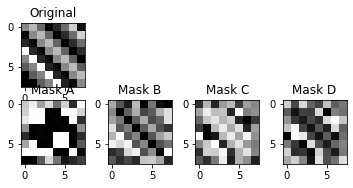

In [136]:
plt.subplot(3,4,1)
plt.imshow(pattern, 'gray')
plt.title('Original')

plt.subplot(3,4,5)
plt.imshow(a_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask A')

plt.subplot(3,4,6)
plt.imshow(b_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask B')

plt.subplot(3,4,7)
plt.imshow(c_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask C')

plt.subplot(3,4,8)
plt.imshow(d_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask D')

In [134]:
# Solve it with scipy.ndimage.convolve
from scipy import ndimage
a_convolved_pattern = ndimage.convolve(pattern_array, mask_a, mode='constant')
b_convolved_pattern = ndimage.convolve(pattern_array, mask_b, mode='constant')
c_convolved_pattern = ndimage.convolve(pattern_array, mask_c, mode='constant')
d_convolved_pattern = ndimage.convolve(pattern_array, mask_d, mode='constant')
print("Mask")
print(mask_a)
print("\nPattern")
print(pattern_array)
print("\nManually masked pattern")
print(a_masked_pattern)
print("\nConvolved pattern")
print(a_convolved_pattern)

Mask
[[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]]

Pattern
[[129 173  99   0  39 104 198  14]
 [  8 130 174  97   0  41 104 200]
 [ 40   8 131 175  95   0  41 105]
 [241  39   9 130 176  93   0  42]
 [125 241  37   9 130 177  91   0]
 [ 88 126 242  35  10 131 178  89]
 [  0  90 126 243  34  10 131 179]
 [  0   0  90 127 244  32  11 132]]

Manually masked pattern
[[  0   0   0   0   0   0   0   0   0   0]
 [  0 201 238 158 219 111 208  42 254   0]
 [  0 207 253 255   3   0 254 253 211   0]
 [  0 232 255 254   1   3   2 254  47   0]
 [  0 147   2   2   0   0   3   1 146   0]
 [  0  42   0   3   1 253 255   3  44   0]
 [  0 165 252   0   1 255 254   0  90   0]
 [  0 254 254 254 254   2   1 253  10   0]
 [  0   0   0  89 215 116  21  41  65   0]
 [  0   0   0   0   0   0   0   0   0   0]]

Convolved pattern
[[201 238 158 219 111 208  42 254]
 [207 253 255   3   0 254 253 211]
 [232 255 254   1   3   2 254  47]
 [147   2   2   0   0   3   1 146]
 [ 42   0   3   1 253 255   3  44]
 [165 252   0   1 

Text(0.5, 1.0, 'Mask D - convolved')

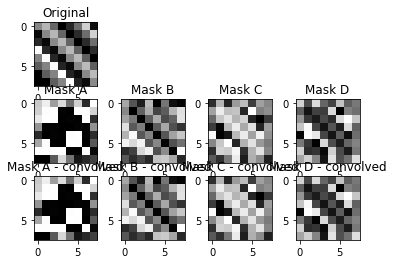

In [135]:
plt.subplot(3,4,1)
plt.imshow(pattern, 'gray')
plt.title('Original')

plt.subplot(3,4,5)
plt.imshow(a_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask A')

plt.subplot(3,4,6)
plt.imshow(b_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask B')

plt.subplot(3,4,7)
plt.imshow(c_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask C')

plt.subplot(3,4,8)
plt.imshow(d_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask D')

plt.subplot(3,4,9)
plt.imshow(a_convolved_pattern, 'gray')
plt.title('Mask A - convolved')

plt.subplot(3,4,10)
plt.imshow(b_convolved_pattern, 'gray')
plt.title('Mask B - convolved')

plt.subplot(3,4,11)
plt.imshow(c_convolved_pattern, 'gray')
plt.title('Mask C - convolved')

plt.subplot(3,4,12)
plt.imshow(d_convolved_pattern, 'gray')
plt.title('Mask D - convolved')